In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv(r'training.csv', header=None)
data.columns = ['#', 'topic', 'sentiment', 'text']
data.dropna(inplace = True, axis = 0)
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [3]:
# text preprocessing: lems, lower case, no numbers, no stopwords
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
text_list = []
for text in data['text']:
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(w.lower()) for w in text if w.isalpha() and w.casefold() not in stop_words]
    text_list.append(text)

In [4]:
text_list[0]

['im', 'getting', 'borderland', 'murder']

In [7]:
new_text_list = []
for t in text_list:
    new_text_list.append(" ".join(str(x) for x in t))

In [9]:
new_text_list[0]

'im getting borderland murder'

In [10]:
data['text'] = new_text_list

In [ ]:
data

In [12]:
#Train/test split
y = data['sentiment']
X = data['text']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

In [14]:
X_train

73178    minecraft x screenshots time neon city absolutely
32037    know without anime league dream successful res...
50966                                   fifa really broken
72506    amazing deal lenovo gen intel core fhd gaming ...
52422                              u feel beauty landscape
                               ...                        
51249       reason playing rival send hate message beating
21545                              yo skyfire take c scene
22418    today carried whole team playvalorant still lo...
52254                                   absolute king shit
5429     thanks comment saturdaykitchen caitlinmoran ev...
Name: text, Length: 48009, dtype: object

In [15]:
y_train

73178      Positive
32037      Positive
50966      Negative
72506       Neutral
52422       Neutral
            ...    
51249    Irrelevant
21545    Irrelevant
22418       Neutral
52254      Negative
5429     Irrelevant
Name: sentiment, Length: 48009, dtype: object

In [192]:
X_test

47343                                cutest doll want girl
935      fantastic review today congratulation brother ...
48857                                                     
71728     ice ghost recon breakpoint store playstation com
23516    lovely anna astashkinacakes posted amazing vid...
                               ...                        
57545    day left valkyrie birthday sale rare opportuni...
31759    riotgames leagueoflegends man glad banning tox...
27774                         marketing team still leaning
65615    johnson samuel stop selling baby formula u off...
62595                       oh shit got one day finish fuk
Name: text, Length: 20872, dtype: object

In [16]:
#embedding
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [17]:
count_test

<23647x21076 sparse matrix of type '<class 'numpy.int64'>'
	with 197941 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [198]:
nb_class = MultinomialNB()

In [199]:
nb_class.fit(count_train, y_train)

MultinomialNB()

In [200]:
pred = nb_class.predict(count_test)

In [201]:
pred

array(['Irrelevant', 'Positive', 'Negative', ..., 'Negative', 'Neutral',
       'Negative'], dtype='<U10')

In [202]:
# Accuracy score count
metrics.accuracy_score(y_test, pred)

0.6986872364890763

In [203]:
metrics.confusion_matrix(y_test, pred, labels=["Negative", "Positive", "Neutral", "Irrelevant"])

array([[5101,  558,  443,  171],
       [ 795, 4217,  371,  192],
       [1011,  878, 3169,  281],
       [ 679,  630,  280, 2096]], dtype=int64)

In [204]:
result = pd.DataFrame(metrics.confusion_matrix(y_test, pred, labels=["Negative", "Positive", "Neutral", "Irrelevant"]), columns = ["Negative", "Positive", "Neutral", "Irrelevant"], index= ["Negative", "Positive", "Neutral", "Irrelevant"])

In [205]:
result

,Negative,Positive,Neutral,Irrelevant
Negative,5101,558,443,171
Positive,795,4217,371,192
Neutral,1011,878,3169,281
Irrelevant,679,630,280,2096


# Sentiment Analysis

In [213]:
new_data = data[(data['sentiment'] == 'Positive') | (data['sentiment'] == 'Negative')] # Выводим только позитивные и негативные комменты

In [ ]:
new_data

In [217]:
#Positive/Negative tweets proportion count 
new_data.sentiment.value_counts() / len(new_data)

Negative    0.523967
Positive    0.476033
Name: sentiment, dtype: float64

In [218]:
# Length of tweets
l_text = new_data.text.str.len()

In [226]:
new_data.iloc[0] 

#                                                         2401
topic                                              Borderlands
sentiment                                             Positive
text         im getting on borderlands and i will murder yo...
Name: 0, dtype: object

In [227]:
l_text

0         53
1         51
2         50
3         51
4         57
        ... 
74677    128
74678    117
74679    125
74680    159
74681    119
Name: text, Length: 41411, dtype: int64

<AxesSubplot:>

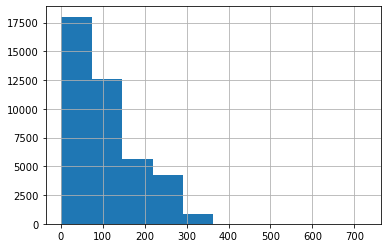

In [221]:
# Length of tweets frequency
l_text.hist()